Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the CSV file to be used.

In [2]:
df = pd.read_csv('traffic3.csv')
df.head()

,Frames,Vehicles,Total
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0


In [3]:
df['Vehicles'] = df['Vehicles'].fillna(0)

In [4]:
df.head()

,Frames,Vehicles,Total
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0


Check the details of the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 3 columns):
Frames      1276 non-null int64
Vehicles    1276 non-null int64
Total       1276 non-null int64
dtypes: int64(3)
memory usage: 30.0 KB


In [6]:
df.describe()

,Frames,Vehicles,Total
count,1276.000000,1276.000000,1276.000000
mean,637.500000,0.210815,20.593260
std,368.493781,0.451829,10.861261
min,0.000000,0.000000,0.000000
25%,318.750000,0.000000,13.000000
50%,637.500000,0.000000,24.000000
75%,956.250000,0.000000,28.000000
max,1275.000000,2.000000,35.000000


In [22]:
count = df['Total'].count()
mean = df['Total'].mean()
median = df['Total'].median()
std = df['Total'].std()
mode=df['Total'].mode().iloc[0]

# Create variables to hold your statements.
countstring = "There are {} records in the data.".format(count)
meanstring = 'The mean of the distribution is {} and the median is {}.'.format(mean,median)
stdstring = 'The standard deviation of the distribution is {}.'.format(std)
modestring='The mode of the distribution is {}.'.format(mode)

print(countstring)
print(meanstring)
print(stdstring)
print(mode)

There are 1276 records in the data.
The mean of the distribution is 20.593260188087775 and the median is 24.0.
The standard deviation of the distribution is 10.8612606077881.
35.0


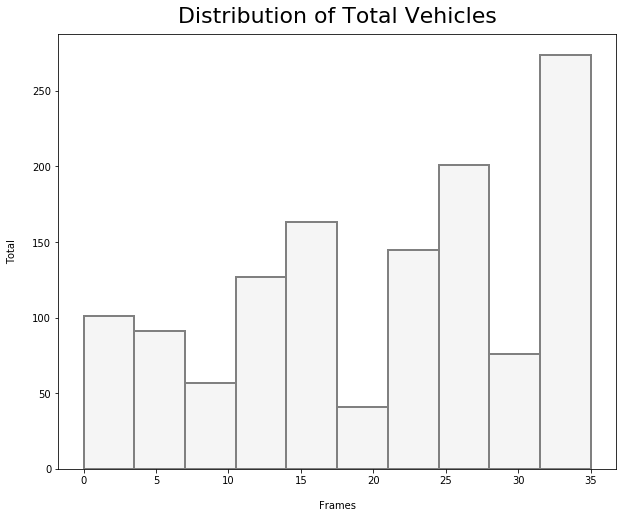

In [23]:
df['Total'].plot(kind='hist', figsize=(10, 8), linewidth=2, color='whitesmoke', edgecolor='gray')
plt.xlabel("Frames", labelpad=15)
plt.ylabel("Total", labelpad=15)
plt.title("Distribution of Total Vehicles", y=1.012, fontsize=22);

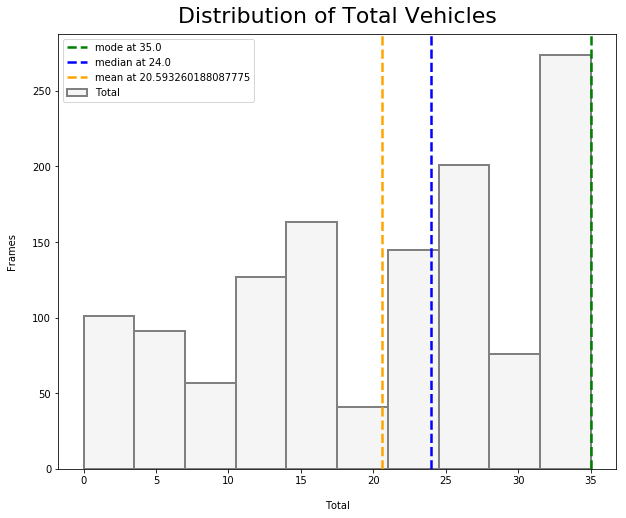

In [26]:
df['Total'].plot(kind='hist', figsize=(10, 8), linewidth=2, color='whitesmoke', edgecolor='gray')
plt.xlabel("Total", labelpad=15)
plt.ylabel("Frames", labelpad=15)
plt.title("Distribution of Total Vehicles", y=1.012, fontsize=22)
measurements = [mode, median, mean]
names = ["mode", "median", "mean"]
colors = ['green', 'blue', 'orange']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend();

Plot a line graph of the dataset.

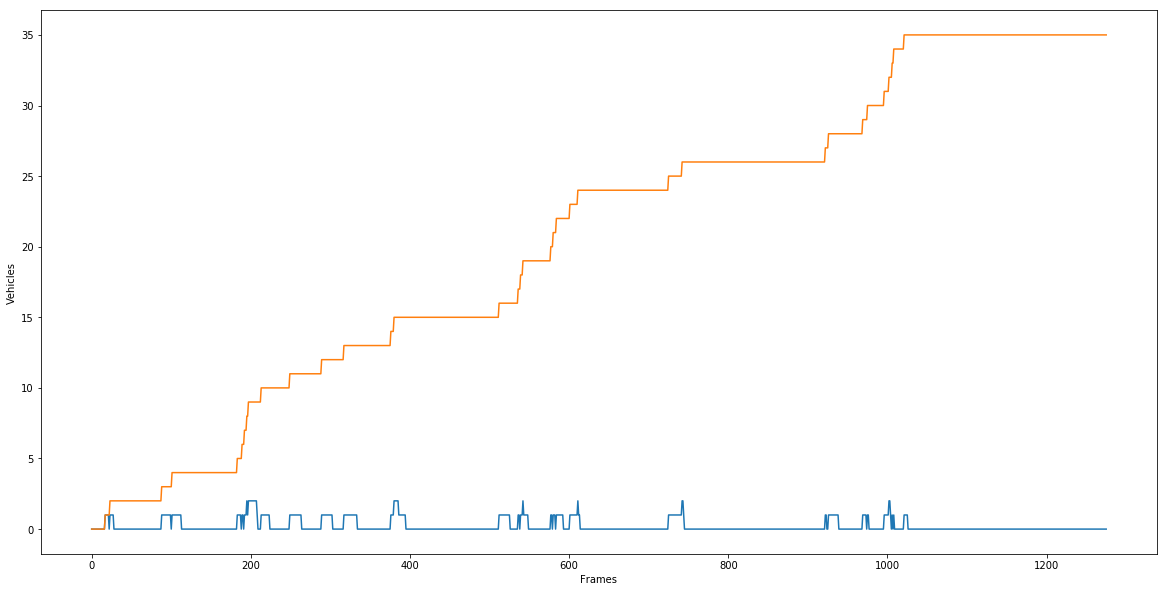

In [8]:
plt.figure(figsize=(20,10))
# Add axis labels
plt.ylabel('Vehicles')
plt.xlabel('Frames')
plt.plot(df.Frames,df.Vehicles,df.Total)

Here we can see that everytime the vehicle per frame increases by one, the total number of vehicles increases. 

Plot a linegraph of the Vehicles per frame and the Total Vehicles.

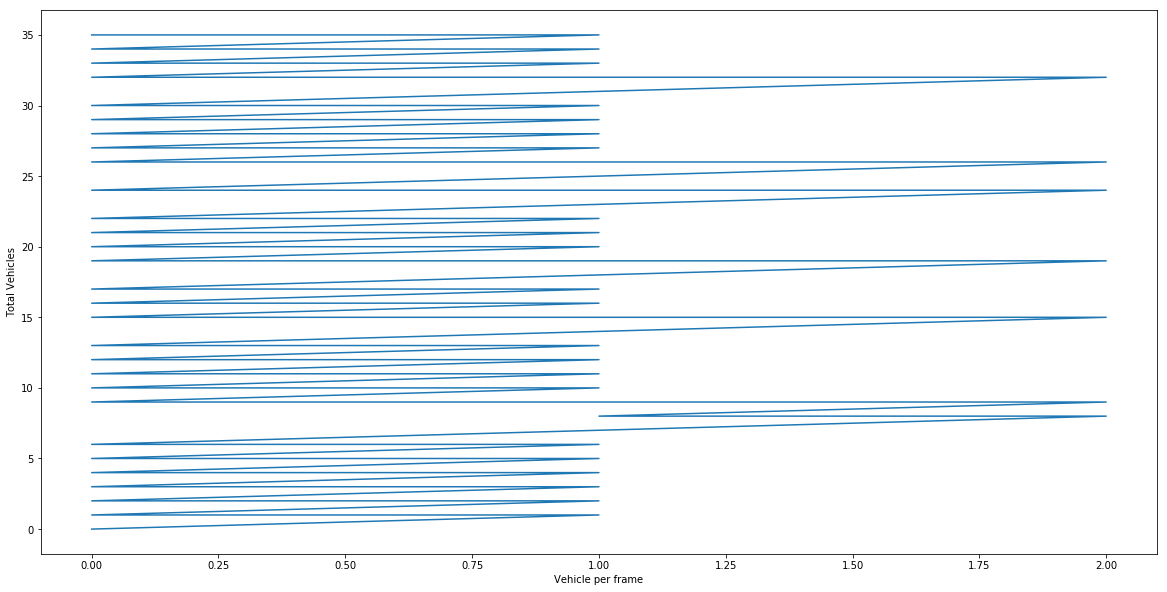

In [9]:
plt.figure(figsize=(20,10))
# Add axis labels
plt.ylabel('Total Vehicles')
plt.xlabel('Vehicle per frame')
plt.plot(df.Vehicles,df.Total)

One thing that can be noted here is that the maximum amount of vehicles that can be detected is 2 as there are only 2 traffic lanes observed in the recorded traffic video.

Here we can see the frequency distribution of the Vehicles per Frame. 

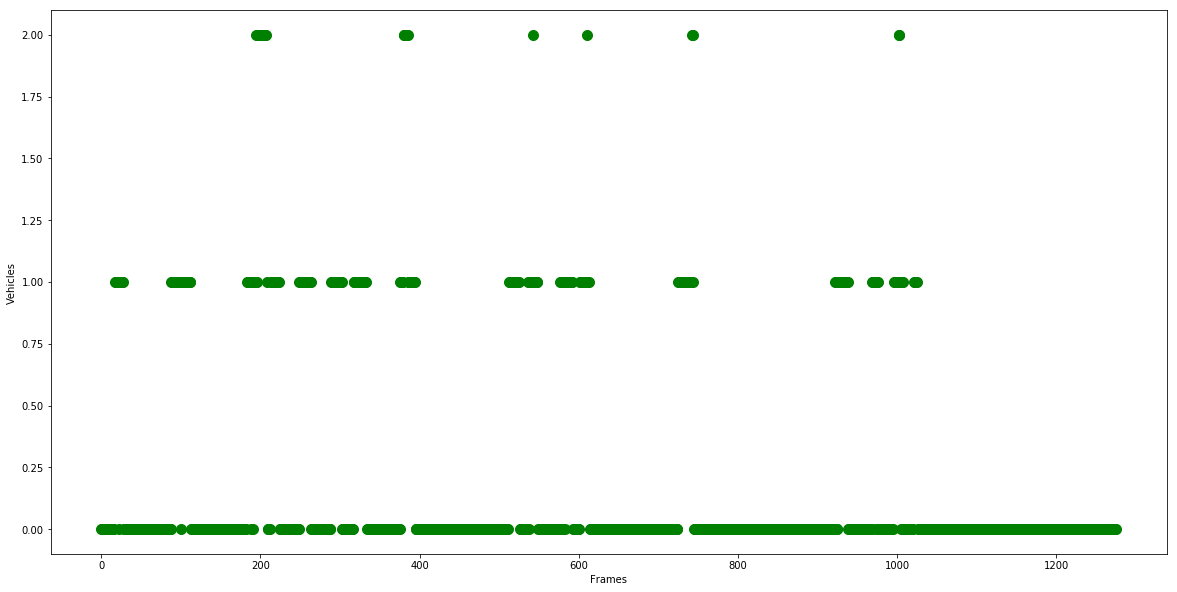

In [10]:
# Set a size for the graph
plt.figure(figsize=(20,10))

# Add axis labels
plt.ylabel('Vehicles')
plt.xlabel('Frames')

# Plot the graph using a round symbol "o" of size 10
plt.plot(df.Frames,df.Vehicles, "o", markersize = 10, color = 'g')

Again, as there are only two lanes observed in the recorded traffic video, the maximum vehicles that can be detected per frame is two. 

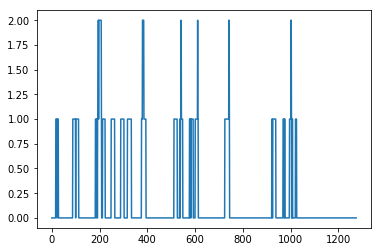

In [11]:
data = np.genfromtxt("traffic3.csv", delimiter=",", names=["x", "y"])
plt.plot(data['x'], data['y'])

In [12]:
df.dtypes

Frames      int64
Vehicles    int64
Total       int64
dtype: object

In [13]:
df_orig=df.copy()

In [14]:
for col in df.columns:
    df[col]=df[col].astype(np.float)

Plot a correlation matrix to see the correlation of the dataset.

In [15]:
corr_mat=df.corr()

for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x]= 0.0
    
corr_mat

,Frames,Vehicles,Total
Frames,0.000000,-0.236286,0.985643
Vehicles,-0.236286,0.000000,-0.201309
Total,0.985643,-0.201309,0.000000


Here we can see that the Frame has a negative correlation to the Vehicles per frame and a positive correlation to the total number of Vehicles.

In [16]:
corr_mat.abs().idxmax()

Frames       Total
Vehicles    Frames
Total       Frames
dtype: object

A negative correlation means there is an opposite relationship between the two data and a positive correlation is means that the two data compared move in the same direction. 

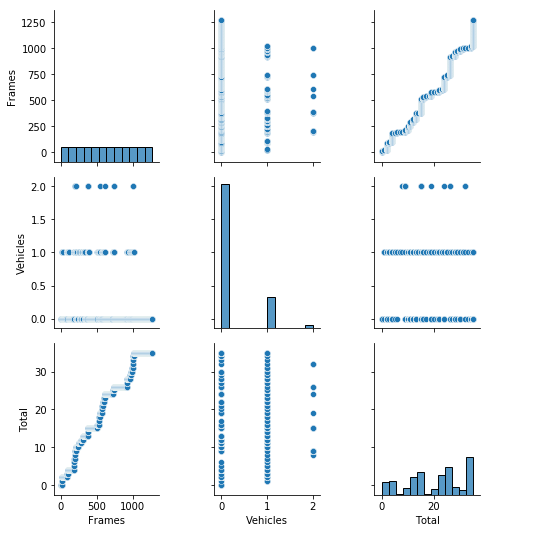

In [25]:
sns.pairplot(df,palette='Set2')